episode: 0 steps: 133
episode: 52 steps: 1
episode: 76 steps: 304
episode: 81 steps: 5
episode: 84 steps: 5
episode: 177 steps: 2
episode: 197 steps: 2
episode: 205 steps: 5
episode: 210 steps: 5
episode: 246 steps: 0
episode: 253 steps: 2
episode: 281 steps: 2
episode: 286 steps: 1
episode: 290 steps: 2
episode: 295 steps: 1
episode: 315 steps: 2
episode: 337 steps: 1
episode: 343 steps: 3
episode: 365 steps: 2
episode: 382 steps: 1
episode: 385 steps: 2
episode: 388 steps: 2
episode: 392 steps: 3
episode: 399 steps: 1
episode: 413 steps: 3
episode: 414 steps: 1
episode: 418 steps: 3
episode: 419 steps: 0
episode: 436 steps: 4
episode: 475 steps: 1
episode: 485 steps: 1
episode: 493 steps: 1
episode: 507 steps: 4
episode: 511 steps: 2
episode: 517 steps: 5
episode: 521 steps: 4
episode: 534 steps: 5
episode: 545 steps: 4
episode: 546 steps: 2
episode: 549 steps: 3
episode: 562 steps: 3
episode: 572 steps: 5
episode: 575 steps: 5
episode: 600 steps: 4
episode: 622 steps: 1
episode: 631

episode: 5466 steps: 4
episode: 5469 steps: 0
episode: 5477 steps: 0
episode: 5482 steps: 3
episode: 5528 steps: 5
episode: 5569 steps: 3
episode: 5578 steps: 4
episode: 5590 steps: 1
episode: 5596 steps: 2
episode: 5610 steps: 1
episode: 5657 steps: 2
episode: 5663 steps: 2
episode: 5665 steps: 2
episode: 5693 steps: 2
episode: 5719 steps: 4
episode: 5724 steps: 4
episode: 5728 steps: 2
episode: 5764 steps: 5
episode: 5765 steps: 0
episode: 5800 steps: 1
episode: 5802 steps: 0
episode: 5807 steps: 5
episode: 5819 steps: 0
episode: 5826 steps: 4
episode: 5837 steps: 4
episode: 5881 steps: 0
episode: 5908 steps: 3
episode: 5925 steps: 2
episode: 5935 steps: 2
episode: 5975 steps: 3
episode: 5978 steps: 2
episode: 5979 steps: 1
episode: 5983 steps: 3
episode: 5993 steps: 2
episode: 6008 steps: 4
episode: 6013 steps: 2
episode: 6014 steps: 2
episode: 6022 steps: 0
episode: 6024 steps: 0
episode: 6039 steps: 3
episode: 6052 steps: 0
episode: 6082 steps: 0
episode: 6112 steps: 3
episode: 61

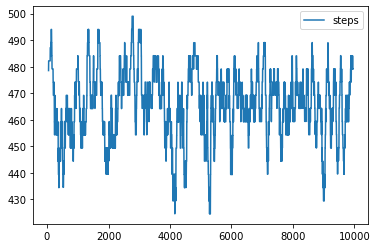

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

class Q_learning(object):
    def __init__(self):
        # 並び替える数列
        self.sequence = [3,2,4,1,5]
        self.action_space = 4
        self.done = False
        self.max_episode = 10000#エピソード数
        self.steps = 500#ステップ数
        self.alpha = 0.8#ステップサイズ
        #できうる数列は5の階乗
        self.q_table = np.random.uniform(low=-1,high=1,size=(5**5,self.action_space))
        
        self.x = []
        self.y = []
        
    def moving_average(self, x, w):
        return np.convolve(x, np.ones(w), 'valid') / w
    
    def action(self,a):
        temp = self.sequence[a+1]
        self.sequence[a+1] = self.sequence[a]
        self.sequence[a] = temp
    
    def decide_action(self,next_state,episode,q_table):
        f_prob = 0.75
        epsilon = f_prob * (1/(episode+1))
        if epsilon <= np.random.uniform(0,1):
            next_action = np.argmax(q_table[next_state])
        else:
            prob = sum(q_table[next_state]+100)
            w = (q_table[next_state]+100)/prob
            next_action = np.random.choice(range(4), p=w)
        return next_action
            
    def get_state(self):
        state = (self.sequence[0]-1)*625+\
                (self.sequence[1]-1)*125+\
                (self.sequence[2]-1)*25+\
                (self.sequence[3]-1)*5+\
                (self.sequence[4]-1)*1
        return state
    
    def check(self):
        if self.sequence == [1,2,3,4,5]:
            return True
        else :
            return False
        
    def update_Qtable(self,state,action,reward,next_state):
        max_q_table = max(self.q_table[next_state])
        #print(state,action,reward,next_state)
        self.q_table[state,action] = (1-self.alpha) * self.q_table[state,action] + self.alpha * (reward + max_q_table) 
    
    def reward(self,done):
        if done == True:
            reward = 1
        else :
            reward = 0
        return reward
        
    def run(self):
        for episode in range(self.max_episode):
            self.sequence = random.sample(self.sequence, 5)
            state = self.get_state()
            action = np.argmax(self.q_table[state])
            for i in range(self.steps):
                #print(self.sequence)
                self.action(action)
                done = self.check()
                reward = self.reward(done)
                next_state = self.get_state()
                self.update_Qtable(state,action,reward,next_state)
                action = self.decide_action(next_state,episode,self.q_table)
                state = next_state
                if done:
                    print("episode: {0} steps: {1}".format(episode,i))
                    break
            self.x.append(episode)
            self.y.append(i)
        self.y = self.moving_average(self.y, 100)
        del self.x[:49]
        del self.x[-50:]
        plt.plot(self.x, self.y, label="steps")
        plt.legend()
        plt.show()
            
if __name__ == "__main__":
   Q_learning().run()     